#### *Prever se uma célula é Benigna ou Maligna usando KNN*

Observe as ações/instruções abaixo.
Justifique cada passo e apresente a conclusão final da análise.

##### *Bibliotecas*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [4]:
df.shape

(569, 31)

In [5]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [7]:
df['diagnosis'] = df['diagnosis'].astype('category')

In [8]:
df.dtypes

diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

##### *Quanto regular é a distribuição da categoria*

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

###### *É uma boa distribuição*

#### *Divisão dos dados*

In [10]:
y = df['diagnosis']
x = df.drop('diagnosis', axis=1)

##### *Normalização dos dados*

Opcional...

In [11]:
from scipy.stats import zscore
xscaled = x.apply(zscore)

In [12]:
xscaled.describe().T
# All will have the same std

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,-1.373633e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
texture_mean,569.0,6.868164e-17,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
perimeter_mean,569.0,-1.248757e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_mean,569.0,-2.185325e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
smoothness_mean,569.0,-8.366672e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
compactness_mean,569.0,1.873136e-16,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
concavity_mean,569.0,4.995028e-17,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
concave points_mean,569.0,-4.995028e-17,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
symmetry_mean,569.0,1.748260e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
fractal_dimension_mean,569.0,4.745277e-16,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


#### Modelo KNN

##### *A divisão dos dados*

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(xscaled,y, test_size=0.3, random_state=1)

In [15]:
from sklearn.neighbors import  KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Utilizamos weights='distance' para dar prioridade ao vizinho mais próximo
# também se pode usar pesos='uniforme', trataria todos os vizinhos de forma igual sem considerar a distância

In [16]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [17]:
KNN_predict = KNN.predict(x_test)
KNN_predict

array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [18]:
KNN.score(x_test, y_test)

0.9532163742690059

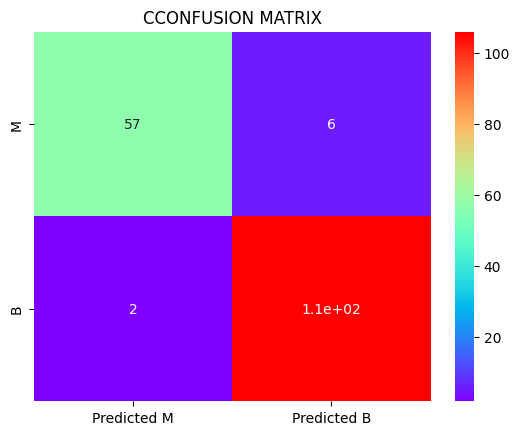

In [19]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, KNN_predict, labels=['M', 'B'])

df_cm = pd.DataFrame(cm, index =[i for i in ['M', 'B']],
                     columns = [i for i in ['Predicted M', 'Predicted B']])

sns.heatmap(df_cm, annot=True, cmap='rainbow')
plt.title('CCONFUSION MATRIX')
plt.show()

#### *Como escolher os K(n_neighbors)*

In [20]:
from sklearn.model_selection import cross_val_score

score_1 = []

for i in range(1,50):
    KNN_2 = KNeighborsClassifier(n_neighbors=i)
    score_2 = cross_val_score(KNN_2,xscaled, y, cv=10) # cv=10 significa que para cada pontuação, esta será feita 10 vezes
    score_1.append(score_2.mean()) # a média de cada pontuação (recorde-se que cada pontuação foi calculada 10 vezes)

In [21]:
score_1

[np.float64(0.9507518796992482),
 np.float64(0.9560463659147869),
 np.float64(0.9647869674185465),
 np.float64(0.9648182957393484),
 np.float64(0.9666353383458647),
 np.float64(0.9648496240601503),
 np.float64(0.9683897243107771),
 np.float64(0.9648809523809524),
 np.float64(0.9648496240601503),
 np.float64(0.9648809523809524),
 np.float64(0.9683897243107769),
 np.float64(0.9613408521303258),
 np.float64(0.9666353383458647),
 np.float64(0.9595864661654134),
 np.float64(0.9613408521303256),
 np.float64(0.9613095238095237),
 np.float64(0.963095238095238),
 np.float64(0.9542919799498746),
 np.float64(0.9542919799498746),
 np.float64(0.9542919799498746),
 np.float64(0.9560463659147869),
 np.float64(0.9542919799498746),
 np.float64(0.9542919799498746),
 np.float64(0.9525375939849624),
 np.float64(0.9560776942355889),
 np.float64(0.9543233082706767),
 np.float64(0.9560776942355889),
 np.float64(0.9525375939849623),
 np.float64(0.9560776942355889),
 np.float64(0.9525375939849623),
 np.float64

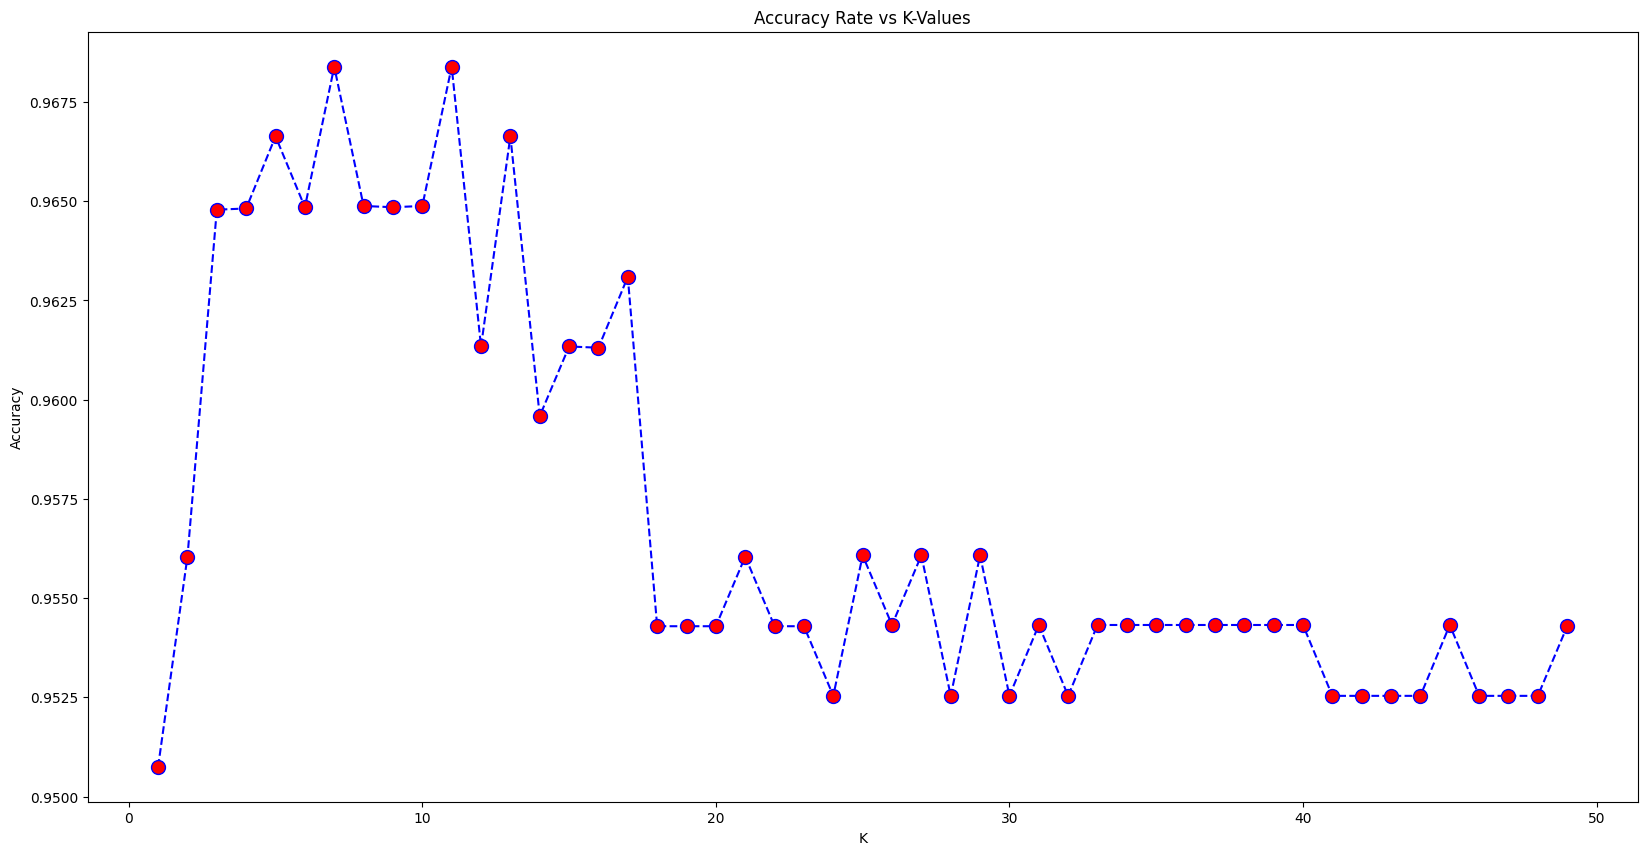

In [22]:
plt.figure(figsize=(20,10))

plt.plot(range(1,50), score_1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Accuracy Rate vs K-Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

#### *Usar o melhor **k***

In [23]:

model = KNeighborsClassifier(n_neighbors=9, weights='distance')
# I used weights='distance' so that it will give priority to the nearest neighbor
# you can also use weights='uniform', it owuld treated all neighbors equally without considering the distance

In [24]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [25]:
model.score(x_test, y_test)

0.9649122807017544

### ***Conclusão***

O modelo KNN demonstrou ser eficaz para classificar células como benignas ou malignas, após a realização de um pré-processamento adequado dos dados e a normalização das variáveis. A validação cruzada foi essencial para escolher o valor ótimo de k, que foi 9, garantindo a melhor performance do modelo. A matriz de confusão revelou que o modelo apresentou uma boa precisão na classificação das células.